# STA 141B: Homework 6
Winter 2018

## Student Information

After the colons (in the same line) please write just your first name, last name, and the 9 digit student ID number below.

First Name: Edward

Last Name: Kang

Student ID: 912655433

## Instructions

We use a script that extracts your answers by looking for cells in between the cells containing the exercise statements.  So you 

- MUST add cells in between the exercise statements and add answers within them and
- MUST NOT modify the existing cells, particularly not the problem statement

To make markdown, please switch the cell type to markdown (from code) - you can hit 'm' when you are in command mode - and use the markdown language.  For a brief tutorial see: https://daringfireball.net/projects/markdown/syntax

# Web scraping the Aggie

In this assignment, you'll scrape text from [The California Aggie](https://theaggie.org/) and then analyze the text.

The Aggie is organized by category into article lists. For example, there's a [Campus News](https://theaggie.org/campus/) list, [Arts & Culture](https://theaggie.org/arts/) list, and [Sports](https://theaggie.org/sports/) list. Notice that each list has multiple pages, with a maximum of 15 articles per page.

The goal of exercises 1.1 - 1.3 is to scrape articles from the Aggie for analysis in exercise 1.4.

__Exercise 1.1.__ Write a function that extracts all of the links to articles in an Aggie article list. The function should:

* Have a parameter `url` for the URL of the article list.

* Have a parameter `page` for the number of pages to fetch links from. The default should be `1`.

* Return a list of aricle URLs (each URL should be a string).

Test your function on 2-3 different categories to make sure it works.

Hints:

* Be polite to The Aggie and save time by setting up [requests_cache](https://pypi.python.org/pypi/requests-cache) before you write your function.

* Start by getting your function to work for just 1 page. Once that works, have your function call itself to get additional pages.

* You can use [lxml.html](http://lxml.de/lxmlhtml.html) or [BeautifulSoup](https://www.crummy.com/software/BeautifulSoup/bs4/doc/) to scrape HTML. Choose one and use it throughout the entire assignment.

In [1]:
from fastcache import clru_cache
from urllib.request import urlopen
import numpy as np
import re
import pandas as pd
import functools
from bs4 import BeautifulSoup

In [2]:
def OnePage(url):
    """
    This function accepts url and extracts all of the links to articles in one page in an Aggie article list
    
    """
    parsed_url=urlopen(url)
    page_soup=BeautifulSoup(parsed_url, "html.parser")
    return(page_soup)

In [3]:
def AggieArticleList(url,pages=1):
    """
    This function accepts url and number of pages as input, 
    and extracts all of the links to articles of in an Aggie article list
    
    """
    page_list=[OnePage(url+"/page/"+str(i)) for i in range(1,pages+1)]
    url_list=[[s.findNext().get("href") for s in page.findAll("h2")] for page in page_list]
    urls=[url for list_idx in url_list for url in list_idx]
    return(urls)

In [4]:
test1 = AggieArticleList('https://theaggie.org/arts', 2)
test2 = AggieArticleList('https://theaggie.org/sports',2)

print (test1)
print (len(test1))
print (test2)
print (len(test2))

['https://theaggie.org/2018/03/07/tats-and-tech/', 'https://theaggie.org/2018/03/05/style-watch-earthy-tones-functionality-reign/', 'https://theaggie.org/2018/03/05/sourdough-co-opens-university-mall/', 'https://theaggie.org/2018/03/04/creating-positive-change-fashion-onus/', 'https://theaggie.org/2018/03/04/three-billboards-review/', 'https://theaggie.org/2018/03/01/march-events-calendar/', 'https://theaggie.org/2018/03/01/artists-eye-shuyi-qi/', 'https://theaggie.org/2018/03/01/phantom-thread-review-aggies-arts-desk/', 'https://theaggie.org/2018/02/27/judah-lion-concert-review/', 'https://theaggie.org/2018/02/26/guest-opinion-paddington-2-breaks-new-ground-high-quality-sequels/', 'https://theaggie.org/2018/02/26/inked/', 'https://theaggie.org/2018/02/26/arts-humanities-ges-spring-quarter/', 'https://theaggie.org/2018/02/25/evolution-stereotypical-college-diet/', 'https://theaggie.org/2018/02/25/east-coast-cello-rock-band-meets-davis/', 'https://theaggie.org/2018/02/23/manetti-shrem-e

__Exercise 1.2.__ Write a function that extracts the title, text, and author of an Aggie article. The function should:

* Have a parameter `url` for the URL of the article.

* For the author, extract the "Written By" line that appears at the end of most articles. You don't have to extract the author's name from this line.

* Return a dictionary with keys "url", "title", "text", and "author". The values for these should be the article url, title, text, and author, respectively.

For example, for [this article](https://theaggie.org/2017/02/14/project-toto-aims-to-address-questions-regarding-city-finances/) your function should return something similar to this:
```
{
    'author': u'Written By: Bianca Antunez \xa0\u2014\xa0city@theaggie.org',
    'text': u'Davis residents create financial model to make city\'s financial state more transparent To increase transparency between the city\'s financial situation and the community, three residents created a model called Project Toto which aims to improve how the city communicates its finances in an easily accessible design. Jeff Miller and Matt Williams, who are members of Davis\' Finance and Budget Commission, joined together with Davis entrepreneur Bob Fung to create the model plan to bring the project to the Finance and Budget Commission in February, according to Kelly Stachowicz, assistant city manager. "City staff appreciate the efforts that have gone into this, and the interest in trying to look at the city\'s potential financial position over the long term," Stachowicz said in an email interview. "We all have a shared goal to plan for a sound fiscal future with few surprises. We believe the Project Toto effort will mesh well with our other efforts as we build the budget for the next fiscal year and beyond." Project Toto complements the city\'s effort to amplify the transparency of city decisions to community members. The aim is to increase the understanding about the city\'s financial situation and make the information more accessible and easier to understand. The project is mostly a tool for public education, but can also make predictions about potential decisions regarding the city\'s financial future. Once completed, the program will allow residents to manipulate variables to see their eventual consequences, such as tax increases or extensions and proposed developments "This really isn\'t a budget, it is a forecast to see the intervention of these decisions," Williams said in an interview with The Davis Enterprise. "What happens if we extend the sales tax? What does it do given the other numbers that are in?" Project Toto enables users, whether it be a curious Davis resident, a concerned community member or a city leader, with the ability to project city finances with differing variables. The online program consists of the 400-page city budget for the 2016-2017 fiscal year, the previous budget, staff reports and consultant analyses. All of the documents are cited and accessible to the public within Project Toto. "It\'s a model that very easily lends itself to visual representation," Mayor Robb Davis said. "You can see the impacts of decisions the council makes on the fiscal health of the city." Complementary to this program, there is also a more advanced version of the model with more in-depth analyses of the city\'s finances. However, for an easy-to-understand, simplistic overview, Project Toto should be enough to help residents comprehend Davis finances. There is still more to do on the project, but its creators are hard at work trying to finalize it before the 2017-2018 fiscal year budget. "It\'s something I have been very much supportive of," Davis said. "Transparency is not just something that I have been supportive of but something we have stated as a city council objective [ ] this fits very well with our attempt to inform the public of our challenges with our fiscal situation." ',
    'title': 'Project Toto aims to address questions regarding city finances',
    'url': 'https://theaggie.org/2017/02/14/project-toto-aims-to-address-questions-regarding-city-finances/'
}
```

Hints:

* The author line is always the last line of the last paragraph.

* If you are having trouble working with unicode characters see [the python 3 documentation](https://docs.python.org/3/howto/unicode.html).

In [5]:
def AggieArticle(url):
    """
    This function accepts url and extracts the title, text, and author of an Aggie article
    
    """
    url_parsed=OnePage(url)
    title="".join([s.text for s in url_parsed.findAll("h1") if len(s.text)>0])
    full_text=re.split("Written [Bb]y: "," ".join([u.text for u in url_parsed.findAll("p")]),re.IGNORECASE)
    story=full_text[0]
    if len(full_text)==2:
        author=re.sub("^ | $","","".join(re.findall("^[A-z ]+",full_text[1])))
    else:
        author="Anonymous"
    dict_raw={"author":author,"text":story,"title":title,"url":url}
    return(dict_raw)

__Exercise 1.3.__ Use your functions from exercises 1.1 and 1.2 to get a data frame of 60 [Campus News](https://theaggie.org/campus/) articles and a data frame of 60 [City News](https://theaggie.org/city/) articles. Add a column to each that indicates the category, then combine them into one big data frame.

The "text" column of this data frame will be your corpus for natural language processing in exercise 1.4.

In [6]:
campus = AggieArticleList('https://theaggie.org/campus', 4)
city = AggieArticleList('https://theaggie.org/city', 4)

In [7]:
def data_list(list):
    """
    This function accepts the list of links of articles,
    and creates a list of article with details of the author, text, title, and url.
    """
    data = []
    for url in list:
        data.append(AggieArticle(url))
    return data

In [8]:
campus_data = data_list(campus)
campus_df = pd.DataFrame.from_records(campus_data)
campus_df['category'] = 'campus'
campus_df.head()

,author,text,title,url,category
0,Jacqueline Moore,Guy-Uriel Charles speaks at King Hall Duke Uni...,Duke law professor presents lecture on voting ...,https://theaggie.org/2018/03/06/duke-law-profe...,campus
1,Priyanka Shreedar,Controversial prosecution of UC Davis student ...,Last Week in Senate,https://theaggie.org/2018/03/05/last-week-sena...,campus
2,Clara Zhao,Scammers contact students posing as potential ...,ICC warns students to be wary of suspicious jo...,https://theaggie.org/2018/03/05/icc-warns-stud...,campus
3,Aaron Liss,Noah Benham faces four charges On the night of...,UC Davis student protester arrested at Yiannop...,https://theaggie.org/2018/03/04/uc-davis-stude...,campus
4,Elizabeth Mercado,"ACT slate candidates, disqualified Golden Slat...",Executive ticket candidates claim biases again...,https://theaggie.org/2018/03/01/executive-tick...,campus


In [9]:
city_data = data_list(city)
city_df = pd.DataFrame.from_records(city_data)
city_df['category'] = 'city'
city_df.head()

Some characters could not be decoded, and were replaced with REPLACEMENT CHARACTER.
Some characters could not be decoded, and were replaced with REPLACEMENT CHARACTER.


,author,text,title,url,category
0,Hannan Waliullah,Organization’s annual Live Your Dream Awards p...,Soroptimist International of Greater Davis pre...,https://theaggie.org/2018/03/06/soroptimist-in...,city
1,Anonymous,Keep your own trash Feb. 13 “Reporting party b...,Police Logs,https://theaggie.org/2018/03/06/police-logs-43/,city
2,Rabiya Oberoi,"Yolo Hospice receives $60,000 grant for advanc...",Grant awarded to Yolo Hospice,https://theaggie.org/2018/03/06/grant-awarded-...,city
3,Ahash Francis,Sebastian Oñate to replace Debbie Davis as edi...,Davis Enterprise welcomes new editor,https://theaggie.org/2018/03/05/davis-enterpri...,city
4,Stella Tran,"Brody Wayne Fernandez bows out, leaves message...",Davis City Council candidate exits election race,https://theaggie.org/2018/03/05/davis-city-cou...,city


In [10]:
combine_df = pd.concat([campus_df, city_df])
combine_df = combine_df.reset_index(drop=True)
combine_df

,author,text,title,url,category
0,Jacqueline Moore,Guy-Uriel Charles speaks at King Hall Duke Uni...,Duke law professor presents lecture on voting ...,https://theaggie.org/2018/03/06/duke-law-profe...,campus
1,Priyanka Shreedar,Controversial prosecution of UC Davis student ...,Last Week in Senate,https://theaggie.org/2018/03/05/last-week-sena...,campus
2,Clara Zhao,Scammers contact students posing as potential ...,ICC warns students to be wary of suspicious jo...,https://theaggie.org/2018/03/05/icc-warns-stud...,campus
3,Aaron Liss,Noah Benham faces four charges On the night of...,UC Davis student protester arrested at Yiannop...,https://theaggie.org/2018/03/04/uc-davis-stude...,campus
4,Elizabeth Mercado,"ACT slate candidates, disqualified Golden Slat...",Executive ticket candidates claim biases again...,https://theaggie.org/2018/03/01/executive-tick...,campus
5,George Liao,The Happiness Campaign seeks to reduce anxiety...,"Happiness Campaign strives for less stress, mo...",https://theaggie.org/2018/03/01/happiness-camp...,campus
6,Sabrina Habchi,Ramirez Sigala’s performance as ASUCD senator ...,Senator Term Review: Yajaira Ramirez Sigala,https://theaggie.org/2018/02/27/senator-term-r...,campus
7,Clara Zhao,History behind CALPIRG Who are the people with...,CALPIRG’s Winter Quarter pledge drives,https://theaggie.org/2018/02/27/calpirgs-winte...,campus
8,Clara Zhao,"President Michael Gofman, Vice President Shani...",ASUCD election results announced,https://theaggie.org/2018/02/26/asucd-election...,campus
9,George Liao,Systemwide student advisory board formed to in...,Sexual Violence Prevention and Response Board ...,https://theaggie.org/2018/02/26/sexual-violenc...,campus


__Exercise 1.4.__ Use the Aggie corpus to answer the following questions. Use plots to support your analysis.

* What topics does the Aggie cover the most? Do city articles typically cover different topics than campus articles?

* What are the titles of the top 3 pairs of most similar articles? Examine each pair of articles. What words do they have in common?

* Do you think this corpus is representative of the Aggie? Why or why not? What kinds of inference can this corpus support? Explain your reasoning.

Hints:

*   The [nltk book](http://www.nltk.org/book/) and [scikit-learn documentation](http://scikit-learn.org/stable/modules/feature_extraction.html#text-feature-extraction) may be helpful here.

*   You can determine whether city articles are "near" campus articles from the similarity matrix or with k-nearest neighbors.

*   If you want, you can use the [wordcloud](http://amueller.github.io/word_cloud/) package to plot a word cloud. To install the package, run
    ```
    conda install -c https://conda.anaconda.org/amueller wordcloud
    ```
    in a terminal. Word clouds look nice and are easy to read, but are less precise than bar plots.

In [11]:
import nltk
import wordcloud
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from matplotlib import pyplot as plt
import random
%matplotlib inline

In [12]:
aggie_stopwords=wordcloud.STOPWORDS.union(set(["UC","Davis","will","said","student","people","also","students","event","city","campus"]))

def WordCloud(text):
    """
    This function accepts the text of articles, 
    and creates the word cloud of the article.
    """
    wc=wordcloud.WordCloud(background_color = "white", max_words=2000, stopwords=aggie_stopwords, width=800, height=400)
    wc.generate(text)
    plt.figure(figsize=(20,10))
    plt.imshow(wc)
    plt.axis("off")
    plt.show()

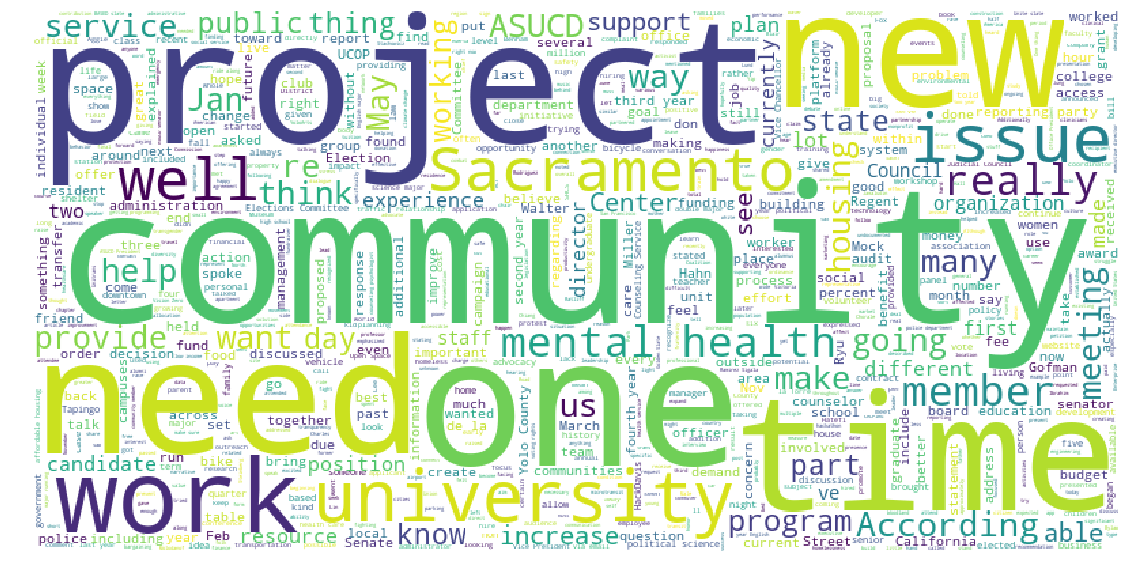

In [13]:
WordCloud(" ".join(combine_df.text))

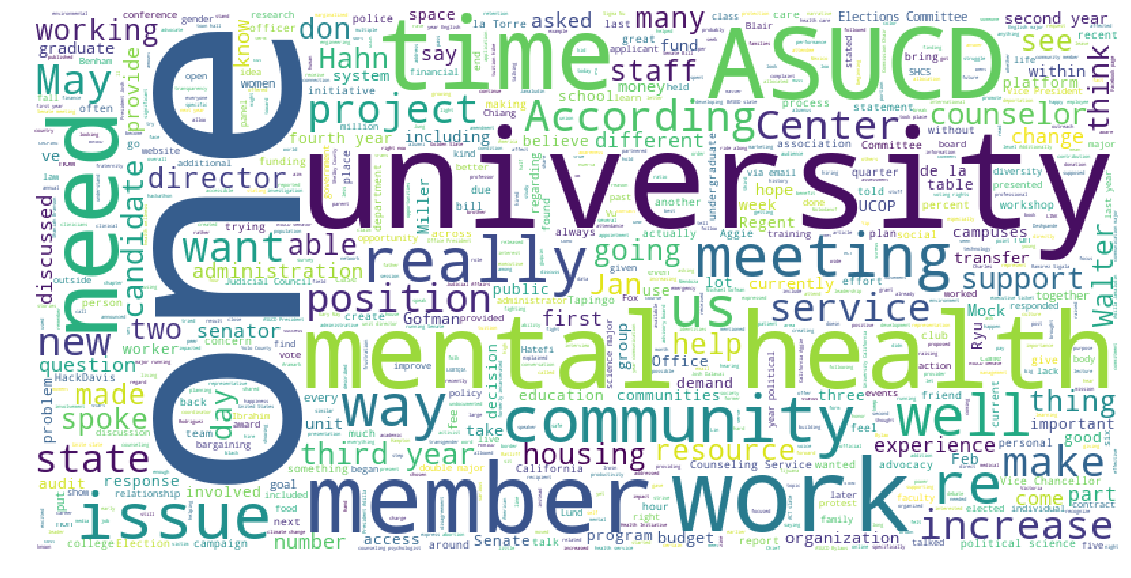

In [14]:
WordCloud(" ".join(campus_df.text))

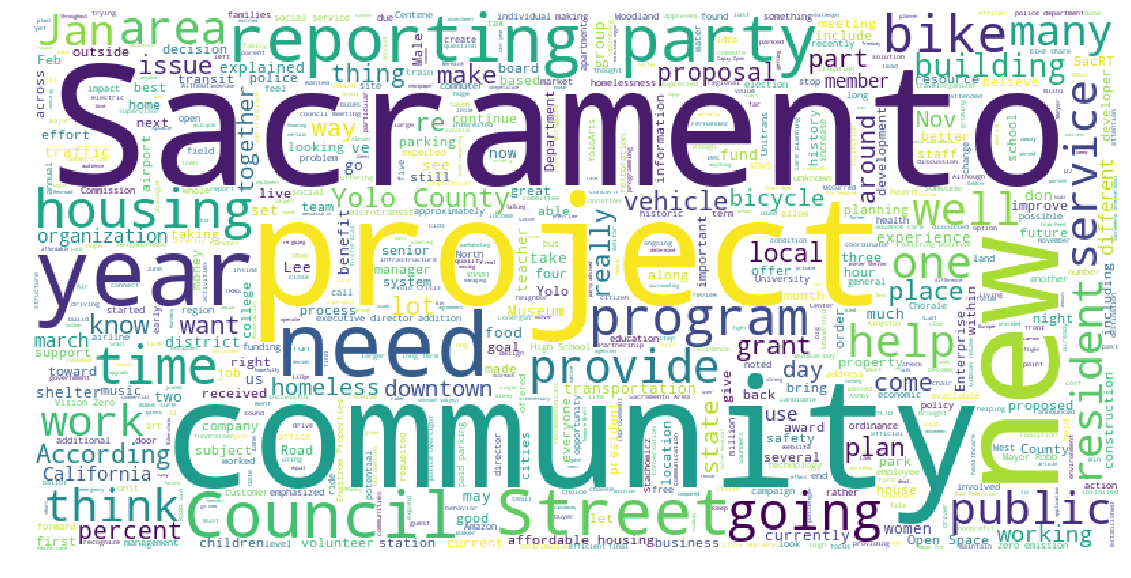

In [15]:
WordCloud(" ".join(city_df.text))

Aggie covers the topics most about the community, work and new project. City articles cover most of the information about the police reporting, city council, housing, project and program in the Sacramento, and the campus articles cover most of the information about mental health, ASUCD, and work in the university.

In [16]:
corpus_raw=". ".join(combine_df.text)
st=nltk.stem.LancasterStemmer()
corpus=set([st.stem(words) for words in nltk.tokenize.word_tokenize(corpus_raw)])
vect=TfidfVectorizer(sublinear_tf=True, max_df=0.5, analyzer='word',stop_words='english',vocabulary=corpus)
vect.fit(corpus)

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=0.5, max_features=None, min_df=1,
        ngram_range=(1, 1), norm='l2', preprocessor=None, smooth_idf=True,
        stop_words='english', strip_accents=None, sublinear_tf=True,
        token_pattern='(?u)\\b\\w\\w+\\b', tokenizer=None, use_idf=True,
        vocabulary={'mh', 'downsid', 'consid', 'trans-exclusionary', 'misalloc', '6', 'everyday.', 'shook', 'four-month', 'disproport', '99', 'portugues', 'decrepit', 'ridic', 'ts', 'ecolog', 'sud', 'vers', 'durgin', 'managers.', 'farrick', 'bir', 'being', 'nation.', 'communications.', '2,000', 'femin', 'wi...l', 'threshold', '2000', 'workspac', '75th', 'hour', 'outfit', 'chin', 'ex-boyfriend', 'an', 'must'})

In [17]:
def getStems(article):
    """
    This function accepts an article,
    and output the set of stem words fro the article
    """
    stems=set([st.stem(words) for words in nltk.tokenize.word_tokenize(article)])
    return(stems)

In [18]:
def getSparseMatrices(arti1,arti2):
    """
    This function accepts two articles,
    and output the cosine similarity score with two articles
    """
    stems=[getStems(d) for d in [arti1,arti2]]
    arti1_vec=np.sum(vect.transform(stems[0]).toarray(),axis=0)
    arti2_vec=np.sum(vect.transform(stems[1]).toarray(),axis=0)
    cos_sim=np.dot(arti1_vec.T,arti2_vec)/(np.linalg.norm(arti1_vec)*np.linalg.norm(arti2_vec))
    return(cos_sim)

In [19]:
sim_mat=[[getSparseMatrices(row,col) for row in combine_df.text] for col in combine_df.text]
similarity=np.array(sim_mat).reshape(120,120)
np.fill_diagonal(similarity,0)
closest_article=np.argsort(similarity)[:,119]
top_score=np.sort(similarity)[:,119]

articles_df=pd.DataFrame([combine_df.title,combine_df.title.values[closest_article],pd.Series(top_score)]).T
articles_df.columns=["title","similar article","score"]
articles_df.sort_values(by="score",ascending=False).iloc[::2,:].head()

,title,similar article,score
59,700 students to attend 24-hour HackDavis hacka...,700 students to attend 24-hour HackDavis hacka...,1
22,Director of Counseling and Psychological Servi...,Mental Health Town Hall erupts in protest,0.501433
39,Internal audit reveals steep decline in counse...,Director of Counseling and Psychological Servi...,0.4945
4,Executive ticket candidates claim biases again...,Adam Hatefi and Shreya Deshpande disqualified ...,0.476848
27,Senator term review: Michael Gofman,ASUCD executive tickets hold CoHo debate,0.444804


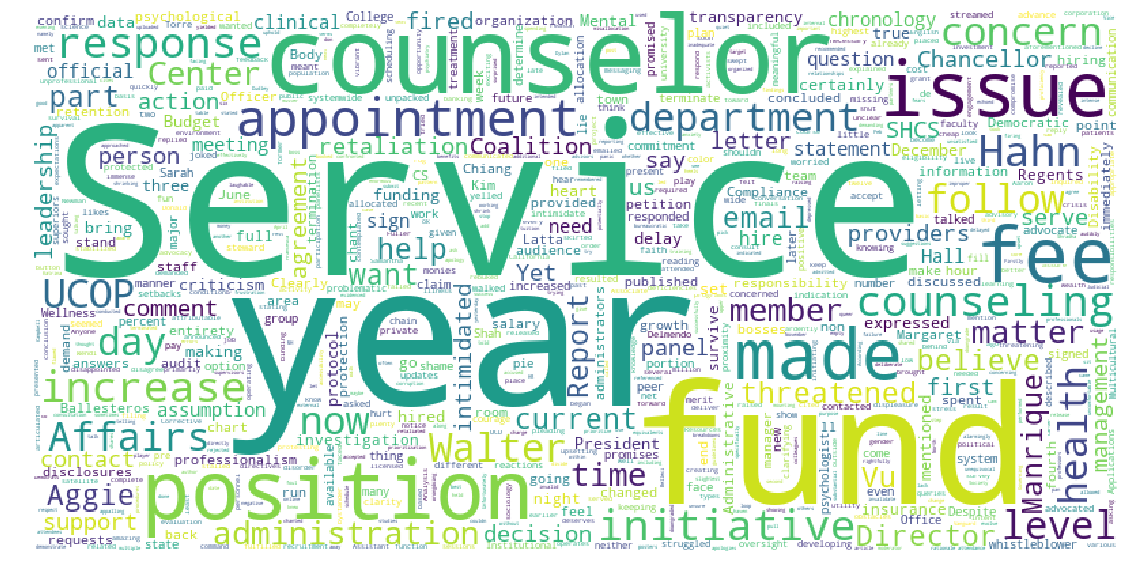

In [20]:
WordCloud(" ".join(set(combine_df.text[22].split(" ")+combine_df.text[closest_article[22]].split(" "))))

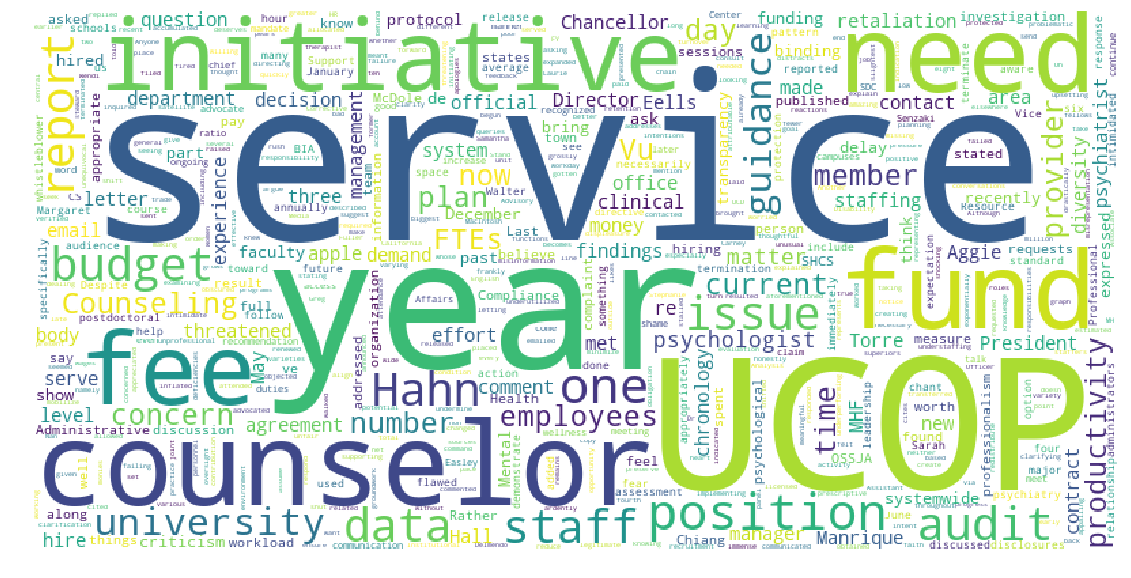

In [21]:
WordCloud(" ".join(set(combine_df.text[39].split(" ")+combine_df.text[closest_article[39]].split(" "))))

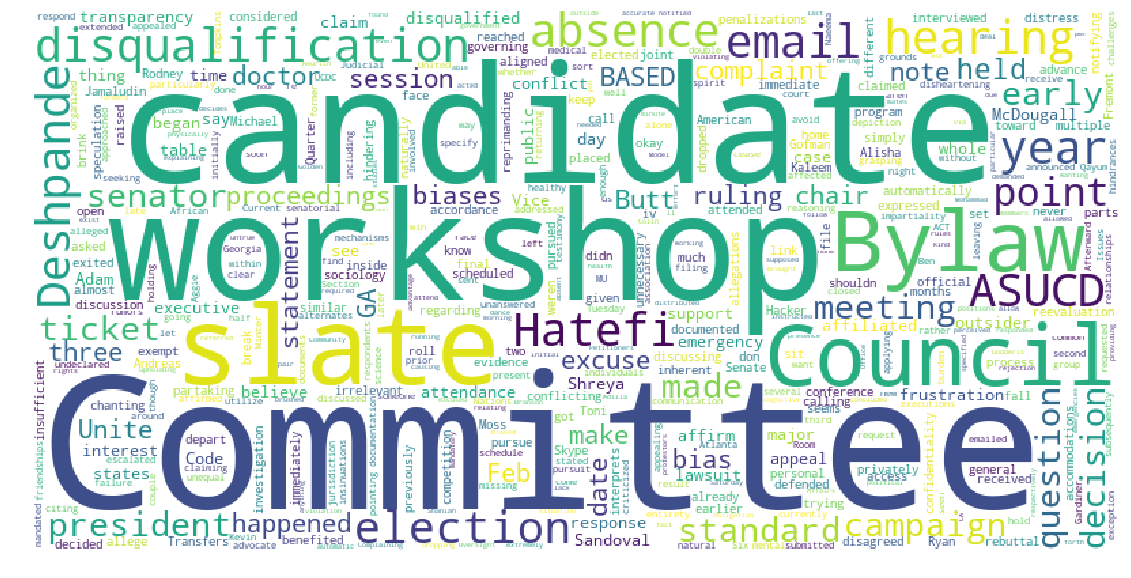

In [22]:
WordCloud(" ".join(set(combine_df.text[4].split(" ")+combine_df.text[closest_article[4]].split(" "))))

Since one of the article is duplicated, we do not count as similar article. Therefore, the top 3 similar articles are: 
1."Director of Counseling and Psychological Services terminated after raising concerns about allocation of mental health funds" and " Mental Health Town Hall erupts in protest".
2."Internal audit reveals steep decline in counselors, $250,000 worth of questionably allocated funds" and Director of "Counseling and Psychological Services terminated after raising concerns about allocation of mental health funds"
3."Executive ticket candidates claim biases against non-ASUCD affiliated individuals" and "Adam Hatefi and Shreya Deshpande disqualified after missing mandatory Candidate Workshop"
The first one have words such as service, fund, and counselor in common.
The second one have words such as service, UCOP, fund, and counselor in common.
The third one have words such as comittee, candidate, and slate in common.

I do not think corpus can represents the Aggie because 120 articles is too samll for the sample size. I think collecting more articles to the data can be more accruately represent the Aggie. This corpus shows a recently hot topic in the Aggie about Director of Counseling and Psychological Services allocated questionably funds and the news about ASUCD.